In [5]:
from pandas_datareader import data, wb
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [6]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [8]:
# Bank of America
BAC = yf.download("BAC", start=start, end=end)


# CitiGroup
C = yf.download("C", start=start, end=end)

# Goldman Sachs
GS = yf.download("GS", start=start, end=end)

# JPMorgan Chase
JPM = yf.download("JPM", start=start, end=end)

# Morgan Stanley
MS = yf.download("MS", start=start, end=end)

# Wells Fargo
WFC = yf.download("WFC", start=start, end=end)

#or we can also use it like this df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [10]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [17]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info','']

In [18]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
                   BAC        BAC        BAC        BAC       BAC           C   
Date                                                                            
2006-01-03   31.370392  31.437023  30.750713  31.263778  16296700  326.256897   
2006-01-04   31.037249  31.477021  30.950626  31.317102  17757900  320.233490   
2006-01-05   31.077232  31.203835  30.864010  31.037255  14970700  321.821991   
2006-01-06   31.030588  31.257138  30.883997  31.183842  12599800  321.821991   
2006-01-09   31.050566  31.297106  30.890650  31.130526  15619400  320.299561   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
                      C           C           C        C  ...         MS   
Date                                                      ...              
2006-01-03   326.852615  318.446332  324.337353  1537600  ...  32.405102   
2006-01-04   324.999272  320.034924  323.410684  1870960  ...  32.427334   
2006-01-05   322.881035  320.365775  320.630536  1143160  ...  32.516254   
2006-01-06   323.675339  319.041949  323.542948  1370210  ...  32.549583   
2006-01-09   322.616255  319.703843  321.689581  1680740  ...  32.894157   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
                    MS         MS         MS       MS        WFC        WFC   
Date                                                                          
2006-01-03   32.505135  31.532593  31.771558  5377000  18.870817  18.915185   
2006-01-04   32.944171  32.427334  32.621844  7977800  18.651943  18.823496   
2006-01-05   32.560715  32.243944  32.538484  5778000  18.631237  18.666730   
2006-01-06   32.705189  32.260599  32.660731  6889800  18.740677  18.796875   
2006-01-09   32.949733  32.577387  32.582945  4144500  18.737720  18.826456   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
                   WFC        WFC       WFC  
Date                                         
2006-01-03   18.453766  18.693349  11016400  
2006-01-04   18.554335  18.811664  10870000  
2006-01-05   18.521797  18.634194  10158000  
2006-01-06   18.566166  18.681520   8403800  
2006-01-09   18.666734  18.737720   5619600  

[5 rows x 30 columns]

In [19]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker     
BAC          BAC     37.937489
C            C      388.967743
GS           GS     186.998810
JPM          JPM     53.933899
MS           MS      50.798607
WFC          WFC     44.486649
dtype: float64

In [20]:
returns = pd.DataFrame()

In [21]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004960,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


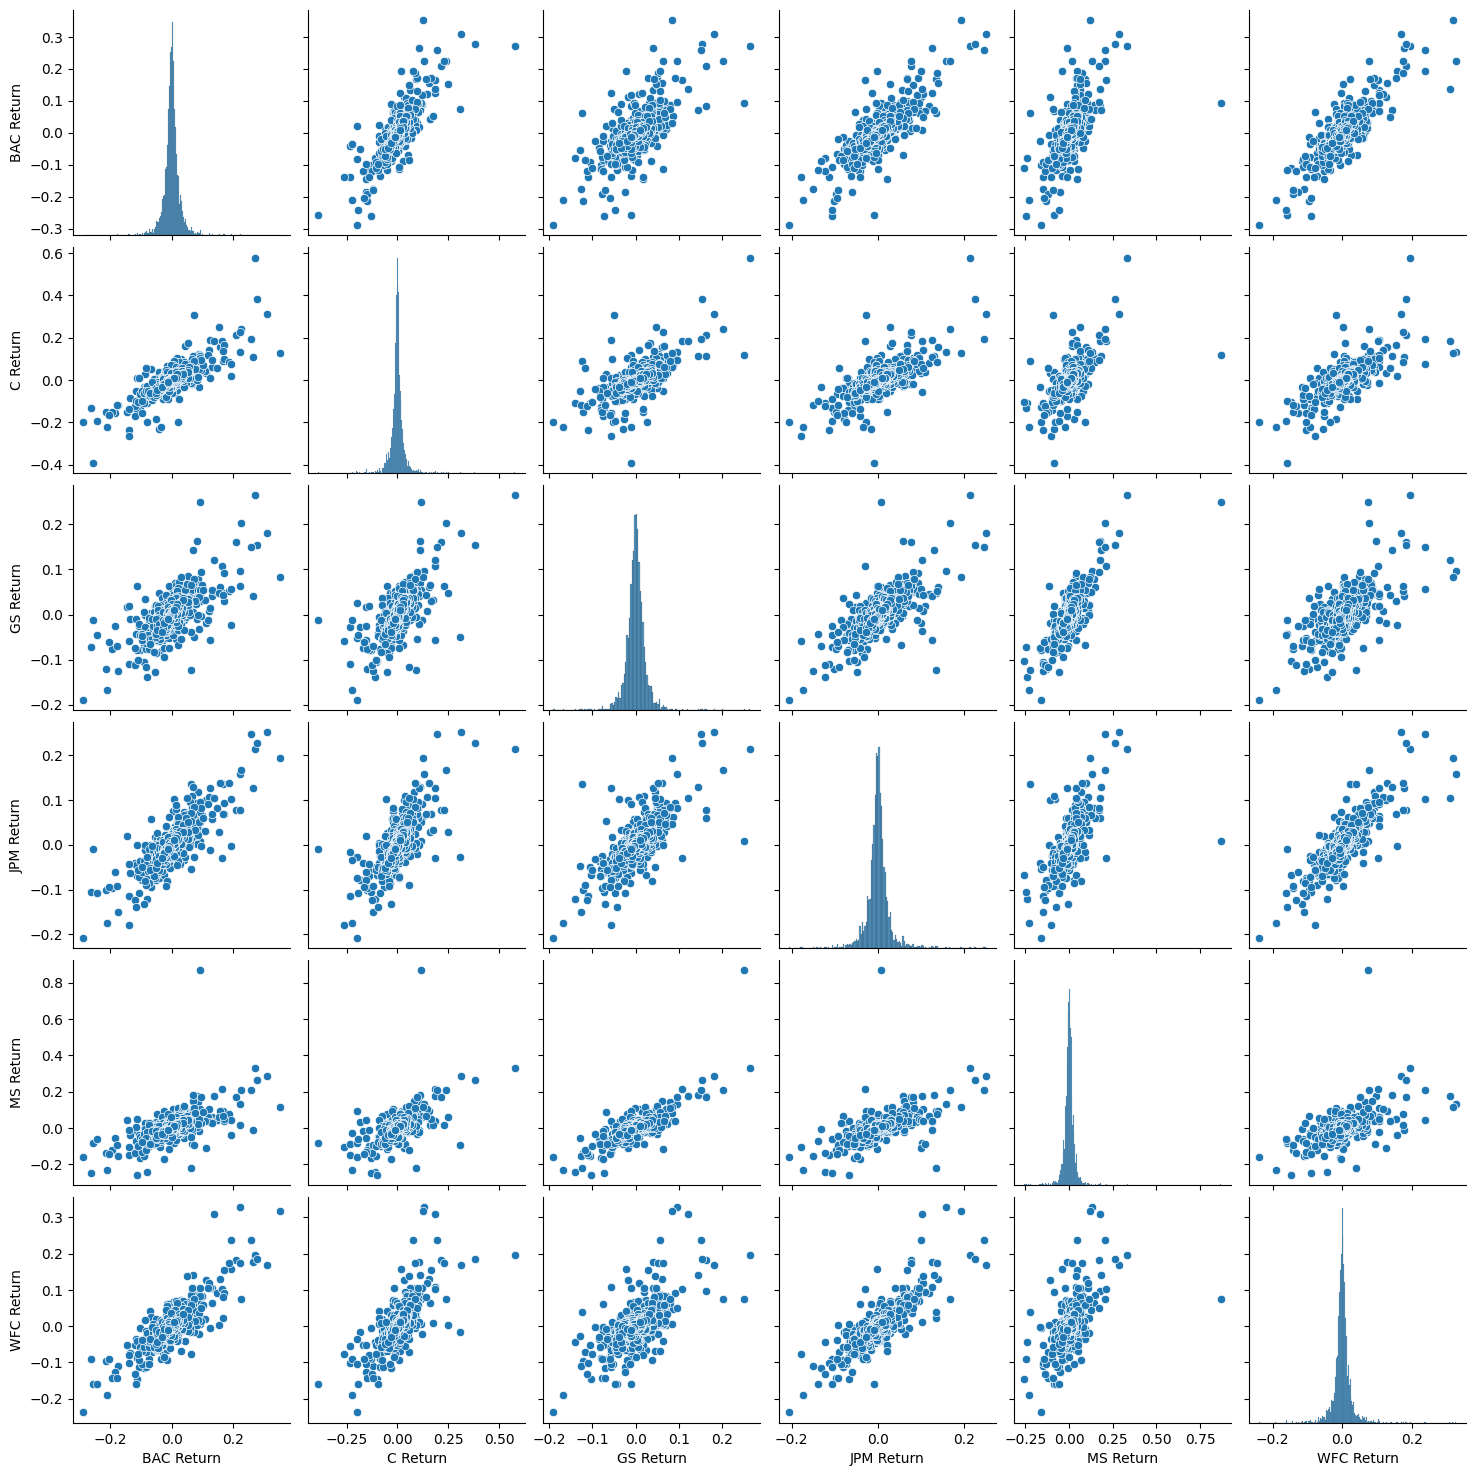

In [22]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

In [23]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [24]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [25]:
returns.std() # Citigroup riskiest

BAC Return    0.036659
C Return      0.038672
GS Return     0.025386
JPM Return    0.027675
MS Return     0.037717
WFC Return    0.030195
dtype: float64

In [30]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WFC Return    0.012552
dtype: float64

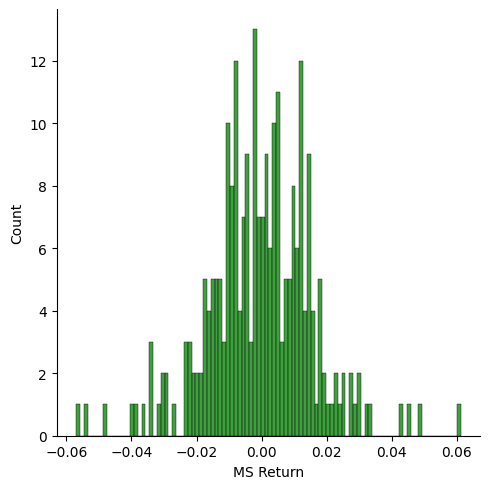

In [33]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

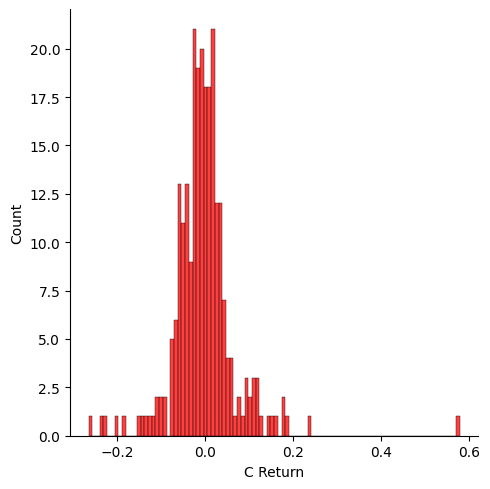

In [34]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

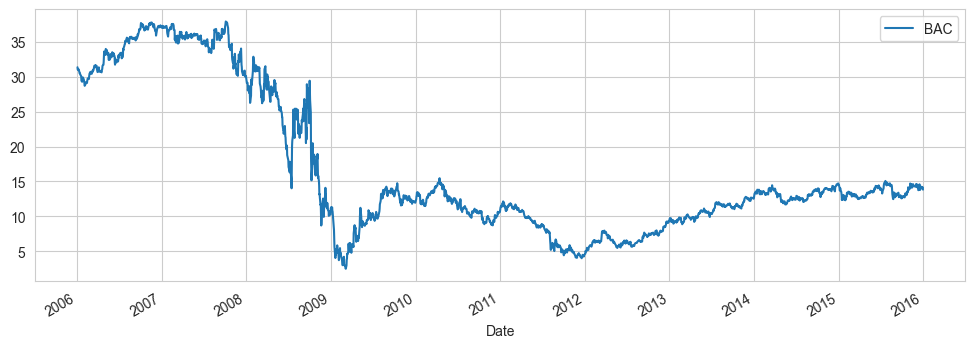

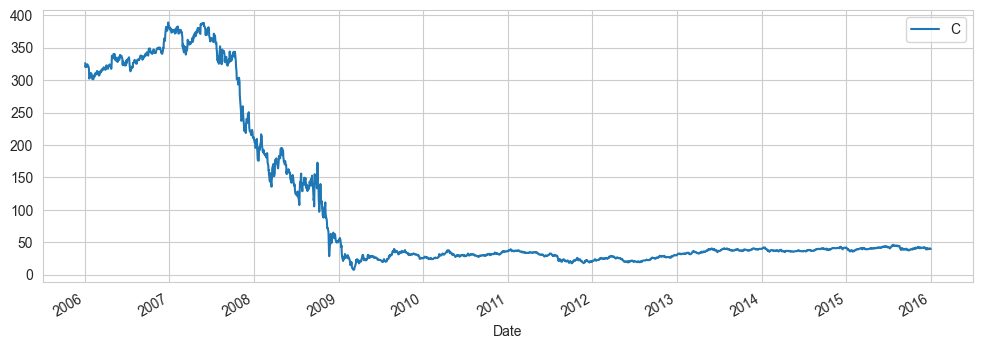

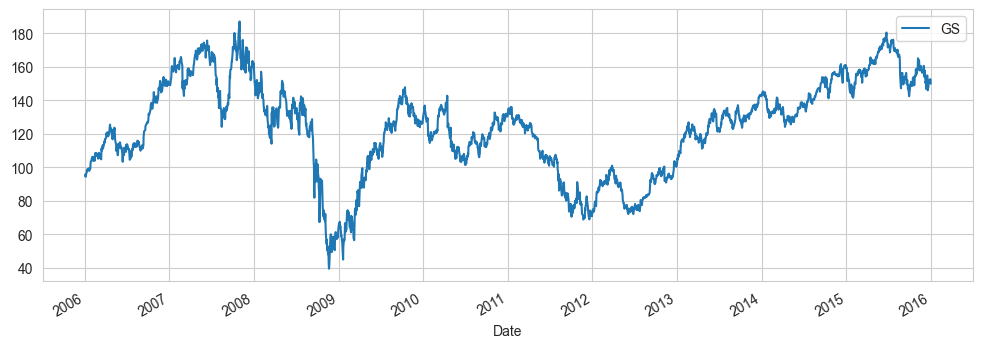

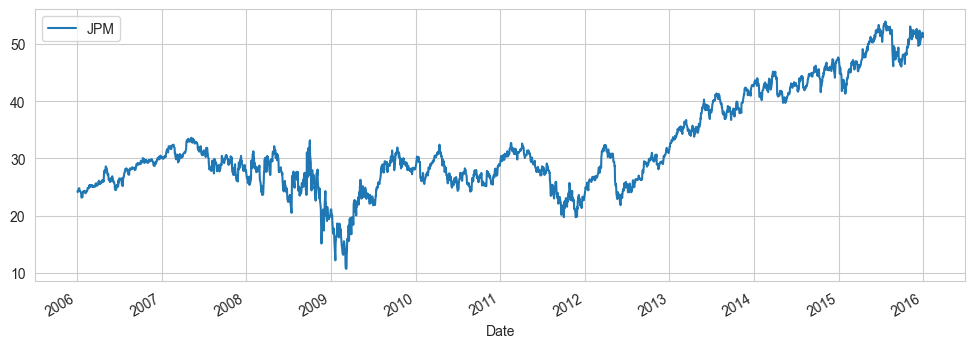

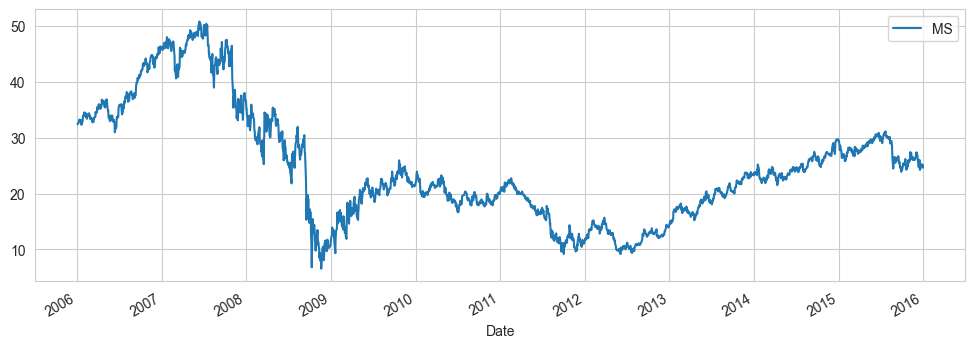

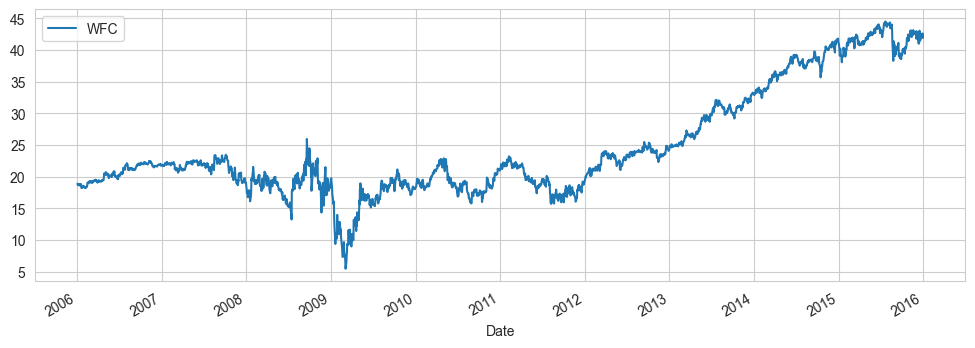

In [36]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<Axes: xlabel='Date'>

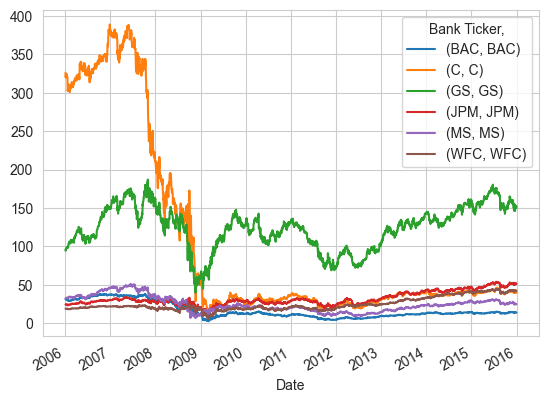

In [37]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [39]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

<Figure size 1200x600 with 0 Axes>

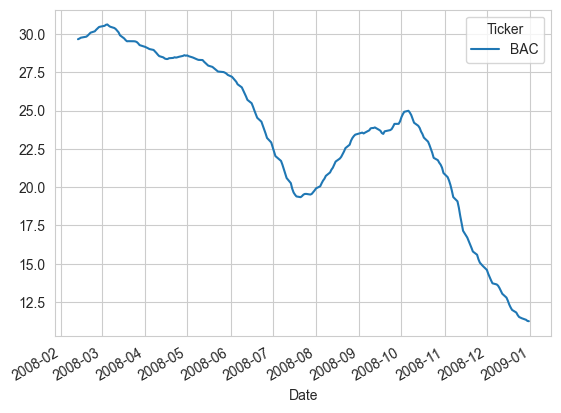

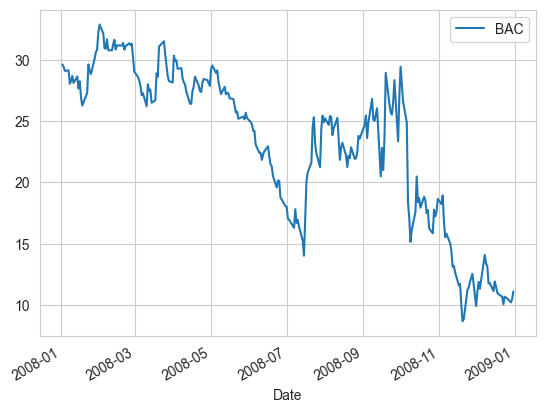

In [40]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<Axes: xlabel='Bank Ticker-', ylabel='Bank Ticker-'>

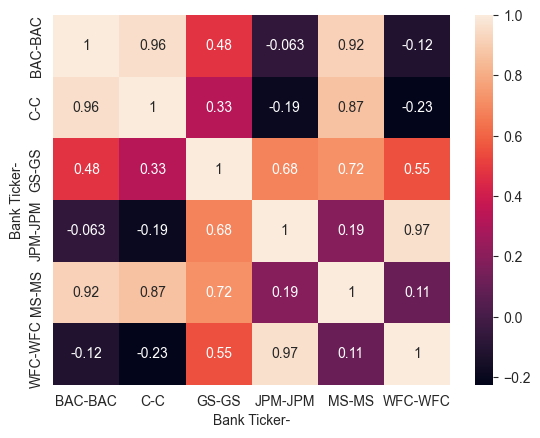

In [41]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

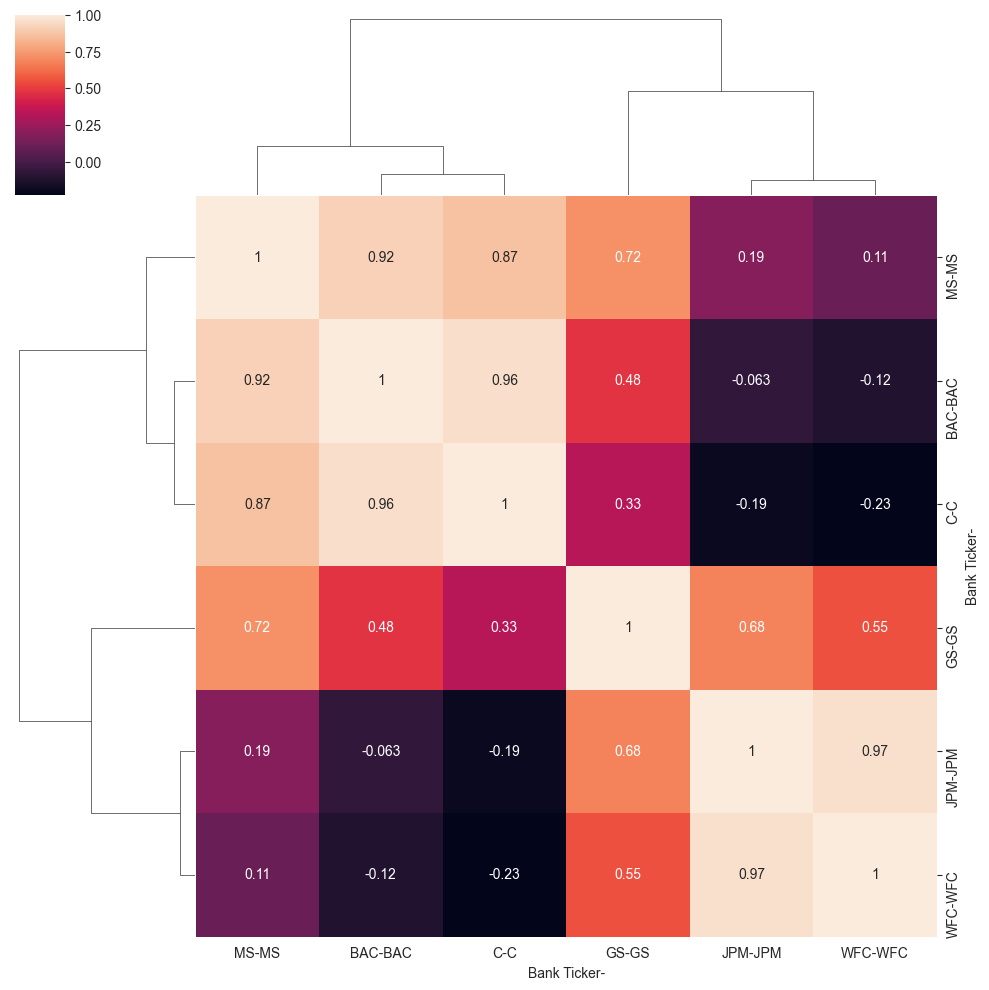

In [42]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [43]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')